In [1]:
# import gzip
f = open('E40ICM_rep1_bismark_bt2_pe.bedGraph','r')
E40ICM_dict = {}
for line in f:
    if line.startswith('track'):
        continue
    else:
        data = line.rstrip('\n').split('\t')
        
        start_base = int(data[1])
        percentage = data[3]
        
        E40ICM_dict[start_base] = percentage

In [2]:
# import gzip
f2 = open('E55Epi_rep1_bismark_bt2_pe.bedGraph','r')
E55Epi_dict = {}
for line in f2:
    if line.startswith('track'):
        continue
    else:
        data = line.rstrip('\n').split('\t')
        
        start_base = (int(data[1]))
        percentage = (data[3])
        
        E55Epi_dict[start_base] = percentage

In [3]:
# Open file 
ref = open('mm10_refseq_genes_chr6_50M_60M.bed')
# Create dictionary
ref_dict = {}
for line in ref:
    # Split and strip
    data = line.rstrip('\n').split('\t')
    ID_field = data[12]
    coords = (int(data[4]), int(data[5]))
    
    if ID_field in ref_dict:
        continue
    else:
        ref_dict[ID_field] = coords

In [4]:
len(ref_dict)

115

In [60]:
gene_length = {}
for key, val in ref_dict.items():
    dif = val[1] - val[0]
    gene_length[key] = dif
#gene_length

In [64]:
E40ICM_new_dict = {}
for key, val in ref_dict.items():
    for key2, val2 in E40ICM_dict.items():
        if key in E40ICM_new_dict:
            # Where the base position is between start and end of coordinate
            if val[0] <= key2 <= val[1]:
                E40ICM_new_dict[key].append(float(val2))
        else:
            # Where base position is between start and end of coordinate
            if val[0] <= key2 <= val[1]:
                E40ICM_new_dict[key] = [float(val2)]

In [71]:
# Sum methylation percentages for each gene
E40ICM_sum = {}
for key, val in E40ICM_new_dict.items():
    s = sum(val)
    E40ICM_sum[key] = s
E40ICM_sum

{'Mpp6': 11343.523684975298,
 'Dfna5': 4450.833333333333,
 'Osbpl3': 12837.71645021645,
 'Cycs': 323.3333333333333,
 '5430402O13Rik': 3245.2380952380954,
 '4921507P07Rik': 2506.6666666666665,
 'Npvf': 400.0,
 'C530044C16Rik': 7100.010822510823,
 'Mir148a': 100.0,
 'Gm6559': 2107.142857142857,
 'Nfe2l3': 3230.8333333333335,
 'Hnrnpa2b1': 438.33333333333337,
 'Cbx3': 1276.5476190476188,
 'Snx10': 6972.041564715479,
 'Skap2': 18849.289321789318,
 'Halr1': 200.0,
 'Hoxa1': 0.0,
 'Hotairm1': 100.0,
 'Hoxa2': 25.0,
 'Hoxaas2': 200.0,
 'Hoxa3': 2256.6666666666665,
 'Hoxa4': 50.0,
 'Hoxaas3': 933.3333333333333,
 'Hoxa5': 100.0,
 'Hoxa6': 33.3333333333333,
 'Mira': 0.0,
 'Hoxa7': 200.0,
 'Hoxa9': 366.66666666666663,
 'Mir196b': 100.0,
 'Hoxa10': 990.9090909090909,
 'Hoxa11': 200.0,
 'Hoxa11os': 100.0,
 'Hoxa13': 100.0,
 'Hottip': 383.3333333333333,
 'Evx1os': 683.3333333333333,
 'Evx1': 700.0,
 '1700094M24Rik': 675.0,
 'Hibadh': 13817.559523809525,
 'Tax1bp1': 7308.968253968254,
 'Jazf1': 19249

In [70]:
# Merge gene length and methylation sum dictionaries as tuple
ds = [E40ICM_sum, gene_length]
d = {}
for k in E40ICM_sum.keys():
    d[k] = tuple(d[k] for d in ds)

In [67]:
# Calculate average of each gene's percent methylation as a function of gene length
E40ICM_avg = {}
for key, val in d.items():
    avg = val[0]/val[1]
    E40ICM_avg[key] = avg
E40ICM_avg

{'Mpp6': 0.12838139936367163,
 'Dfna5': 0.08186645084947364,
 'Osbpl3': 0.14342054552196323,
 'Cycs': 0.08265167007498295,
 '5430402O13Rik': 0.114985582512068,
 '4921507P07Rik': 0.1076423183178025,
 'Npvf': 0.11353959693443089,
 'C530044C16Rik': 0.18308434302503412,
 'Mir148a': 1.0101010101010102,
 'Gm6559': 0.16107191997728612,
 'Nfe2l3': 0.12379146072007868,
 'Hnrnpa2b1': 0.0463354474982382,
 'Cbx3': 0.09752827710654892,
 'Snx10': 0.10442190217941946,
 'Skap2': 0.12288873958854724,
 'Halr1': 0.018628912071535022,
 'Hoxa1': 0.0,
 'Hotairm1': 0.028595939376608523,
 'Hoxa2': 0.010351966873706004,
 'Hoxaas2': 0.05293806246691371,
 'Hoxa3': 0.051280885939796086,
 'Hoxa4': 0.02478929102627665,
 'Hoxaas3': 0.07482229704451926,
 'Hoxa5': 0.035285815102328866,
 'Hoxa6': 0.014749262536873142,
 'Mira': 0.0,
 'Hoxa7': 0.06779661016949153,
 'Hoxa9': 0.08579004835439089,
 'Mir196b': 1.1764705882352942,
 'Hoxa10': 0.10259982303883733,
 'Hoxa11': 0.053966540744738264,
 'Hoxa11os': 0.0220896841175171

In [68]:
E55_new_dict = {}
for key, val in ref_dict.items():
    for key2, val2 in E55Epi_dict.items():
        if key in E55_new_dict:
            # Where the base position is between start and end of coordinate
            if val[0] <= key2 <= val[1]:
                # Append the percent methylation to dictionary key
                E55_new_dict[key].append(float(val2))
        else:
            # Where base position is between start and end of coordinate
            if val[0] <= key2 <= val[1]:
                # Assign percent methylation as value, gene name as key
                E55_new_dict[key] = [float(val2)]

In [73]:
# Sum methylation percentages for each gene 
E55_sum = {}
for key, val in E55_new_dict.items():
    s = sum(val)
    E55_sum[key] = s

In [75]:
# Merge gene length and methylation sum dictionaries as tuple
ds2 = [E55_sum, gene_length]
d2 = {}
for k in E55_sum.keys():
    d2[k] = tuple(d2[k] for d2 in ds2)

In [95]:
# Calculate average of each gene's percent methylation as a function of gene length
E55_avg = {}
for key, val in d2.items():
    avg = val[0]/val[1]
    E55_avg[key] = avg
E55_avg

{'Mpp6': 0.5015476851077475,
 'Dfna5': 0.49729921950202643,
 'Osbpl3': 0.7179750719650844,
 'Cycs': 0.6744205862304021,
 '5430402O13Rik': 0.531388617524039,
 '4921507P07Rik': 0.5058923126943912,
 'Npvf': 0.7777462390008514,
 'C530044C16Rik': 0.5336083892040571,
 'Mir148a': 0.0,
 'Gm6559': 0.7261886561687815,
 'Nfe2l3': 0.5724782984448106,
 'Hnrnpa2b1': 0.38794926004228325,
 'Cbx3': 0.5643072770049621,
 'Snx10': 0.828239290564057,
 'Skap2': 0.5058371635644511,
 'Halr1': 0.7060357675111774,
 'Hoxa1': 0.20896871117135438,
 'Hotairm1': 0.057191878753217046,
 'Hoxa2': 0.0966183574879227,
 'Hoxaas2': 0.08823010411152286,
 'Hoxa3': 0.16064097320062415,
 'Hoxa4': 0.29333994381094036,
 'Hoxaas3': 0.16861739083961302,
 'Hoxa5': 0.20701011526699603,
 'Hoxa6': 0.13274336283185842,
 'Mira': 0.11501463822668344,
 'Hoxa7': 0.1271186440677966,
 'Hoxa9': 0.3880049914209952,
 'Mir196b': 0.0,
 'Hoxa10': 0.22088769241388828,
 'Hoxa11': 0.053966540744738264,
 'Hoxa11os': 0.12517487666593036,
 'Hoxa13': 0.0

In [77]:
len(E55_avg)

113

In [87]:
from collections import defaultdict

final_dict = defaultdict(list)

for d in (E40ICM_avg, E55_avg):
    for k, v in d.items():
        final_dict[k].append(v)

final_dict = {k: tuple(v) for k, v in final_dict.items()}
final_dict

{'Mpp6': (0.12838139936367163, 0.5015476851077475),
 'Dfna5': (0.08186645084947364, 0.49729921950202643),
 'Osbpl3': (0.14342054552196323, 0.7179750719650844),
 'Cycs': (0.08265167007498295, 0.6744205862304021),
 '5430402O13Rik': (0.114985582512068, 0.531388617524039),
 '4921507P07Rik': (0.1076423183178025, 0.5058923126943912),
 'Npvf': (0.11353959693443089, 0.7777462390008514),
 'C530044C16Rik': (0.18308434302503412, 0.5336083892040571),
 'Mir148a': (1.0101010101010102, 0.0),
 'Gm6559': (0.16107191997728612, 0.7261886561687815),
 'Nfe2l3': (0.12379146072007868, 0.5724782984448106),
 'Hnrnpa2b1': (0.0463354474982382, 0.38794926004228325),
 'Cbx3': (0.09752827710654892, 0.5643072770049621),
 'Snx10': (0.10442190217941946, 0.828239290564057),
 'Skap2': (0.12288873958854724, 0.5058371635644511),
 'Halr1': (0.018628912071535022, 0.7060357675111774),
 'Hoxa1': (0.0, 0.20896871117135438),
 'Hotairm1': (0.028595939376608523, 0.057191878753217046),
 'Hoxa2': (0.010351966873706004, 0.0966183574

In [102]:
fold_change = {}
for key, val in final_dict.items():
    # Skip if E4 average is zero
    if val[0] == 0:
        continue 
    # Calculate fold change for differentiation from E4 to E5.5 cells
    try:
        ratio = (val[1] - val[0])/val[0]
        fold_change[key] = ratio
    except IndexError:
        # Skip if there is not a value for both genes in both cells
        pass

In [103]:
fold_change

{'Mpp6': 2.906700562493413,
 'Dfna5': 5.074517880546715,
 'Osbpl3': 4.006082422515501,
 'Cycs': 7.15979381443299,
 '5430402O13Rik': 3.621349963316214,
 '4921507P07Rik': 3.699753039513679,
 'Npvf': 5.849999999999999,
 'C530044C16Rik': 1.9145495479703247,
 'Mir148a': -1.0,
 'Gm6559': 3.5084745762711864,
 'Nfe2l3': 3.6245378729258015,
 'Hnrnpa2b1': 7.372623574144485,
 'Cbx3': 4.786088852861212,
 'Snx10': 6.93166254662707,
 'Skap2': 3.1162206175934544,
 'Halr1': 36.9,
 'Hotairm1': 1.0,
 'Hoxa2': 8.333333333333334,
 'Hoxaas2': 0.666666666666667,
 'Hoxa3': 2.132570162481536,
 'Hoxa4': 10.833333333333334,
 'Hoxaas3': 1.2535714285714283,
 'Hoxa5': 4.866666666666667,
 'Hoxa6': 8.000000000000009,
 'Hoxa7': 0.8749999999999999,
 'Hoxa9': 3.522727272727274,
 'Mir196b': -1.0,
 'Hoxa10': 1.152905198776758,
 'Hoxa11': 0.0,
 'Hoxa11os': 4.666666666666667,
 'Hoxa13': 1.0,
 'Hottip': 1.5217391304347825,
 'Evx1os': 1.3414634146341464,
 'Evx1': 0.09523809523809529,
 '1700094M24Rik': 5.802469135802467,
 'Hi

In [104]:
len(fold_change)

95

In [105]:
f = open("fold_change.txt","w")
f.write(str(fold_change))
f.close()

In [109]:
for key, val in fold_change.items():
    if val == 0:
        print(key, val)

Hoxa11 0.0
Vmn1r29 0.0


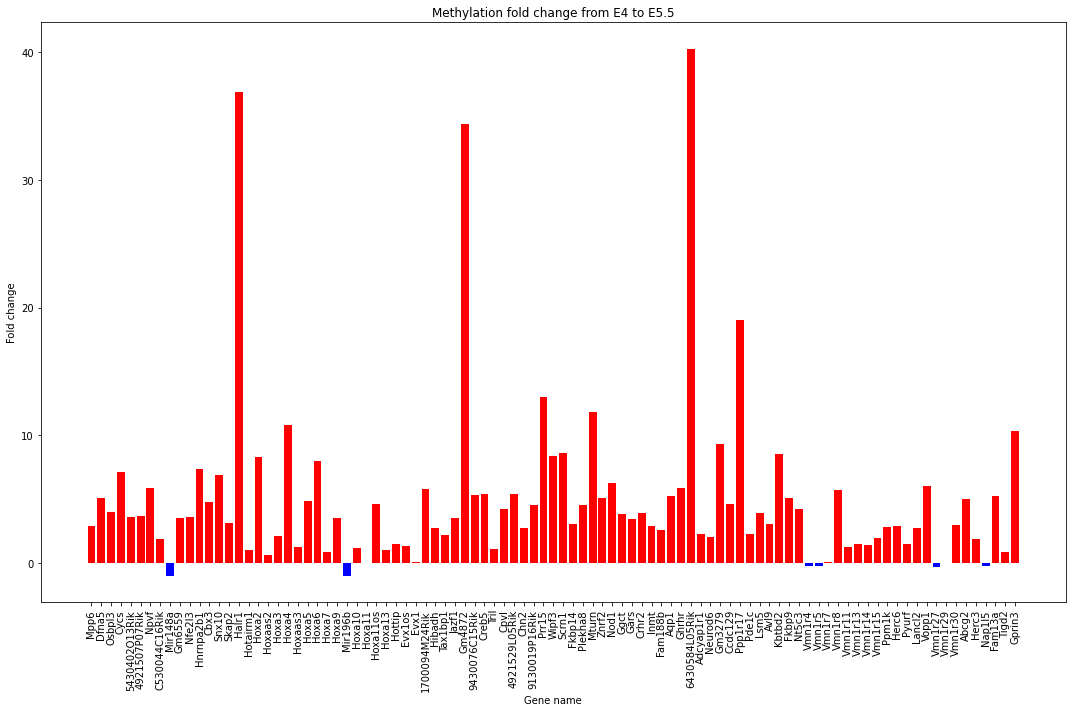

In [110]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))
labels = list(fold_change.keys())
data = list(fold_change.values())
colors = ['red' if x > 0 else 'blue' for x in data]

ax.bar(labels, data, align='center', color=colors)
ax.tick_params('x',labelrotation=90)
ax.set_xlabel('Gene name')
ax.set_ylabel('Fold change')
ax.set_title('Methylation fold change from E4 to E5.5')
plt.tight_layout()

plt.show()

In [ ]:
\